# Decision Tree Classifier

This notebook demonstrates how to build and evaluate **Decision Tree classifiers** using the `scikit-learn` library.

We use two datasets:
1. A **synthetic dataset** simulating vibration, temperature, and acoustic readings.
2. A **real predictive maintenance dataset** from Dr. Alaa Khamis’ GitHub repository.

For each dataset, we will:
- Train a Decision Tree Classifier
- Display the confusion matrix
- Plot the ROC curve
- Compute and display accuracy, precision, recall, and F1-score

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc,
                             accuracy_score, precision_score, recall_score, f1_score)
from sklearn.preprocessing import LabelEncoder

# Set plotting style
plt.style.use('seaborn-v0_8-colorblind')

### 1️⃣ Synthetic Dataset Example

This dataset mimics simple sensor data readings for 8 machines:
- **Vibration**, **Temperature**, and **Acoustic level**
- Machines are labeled as either **Faulty** or **Healthy**.

In [2]:
# Define synthetic dataset
data = {
    'vibration': [9.8, 9.2, 7.5, 8.9, 1.8, 2.5, 2.2, 2.8],
    'temperature': [105, 110, 98, 102, 65, 75, 70, 72],
    'acoustic': [78, 74, 80, 72, 42, 48, 45, 50],
    'class': ['Faulty', 'Faulty', 'Faulty', 'Faulty', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
}
df_synth = pd.DataFrame(data)
df_synth

,vibration,temperature,acoustic,class
0,9.8,105,78,Faulty
1,9.2,110,74,Faulty
2,7.5,98,80,Faulty
3,8.9,102,72,Faulty
4,1.8,65,42,Healthy
5,2.5,75,48,Healthy
6,2.2,70,45,Healthy
7,2.8,72,50,Healthy


Accuracy:  1.000
Precision: 1.000
Recall:    1.000
F1-score:  1.000


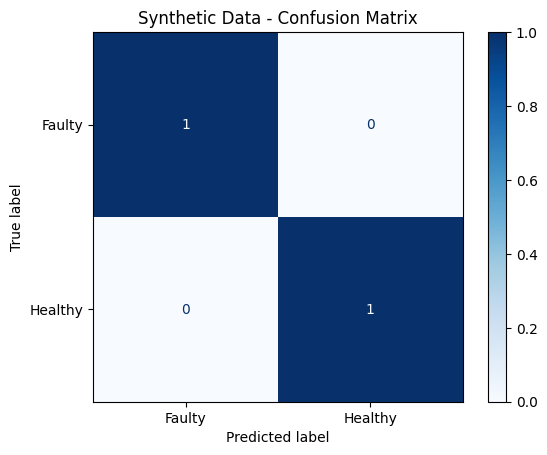

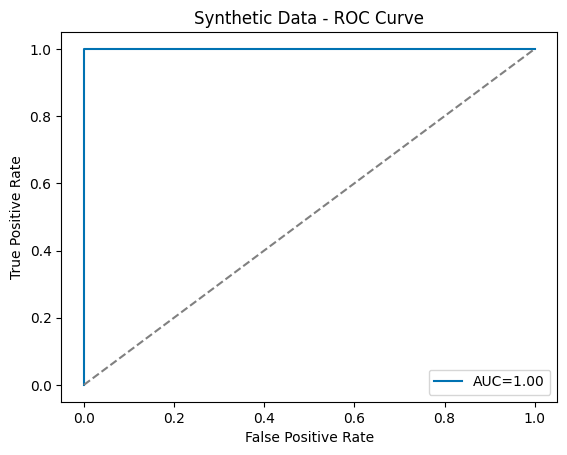

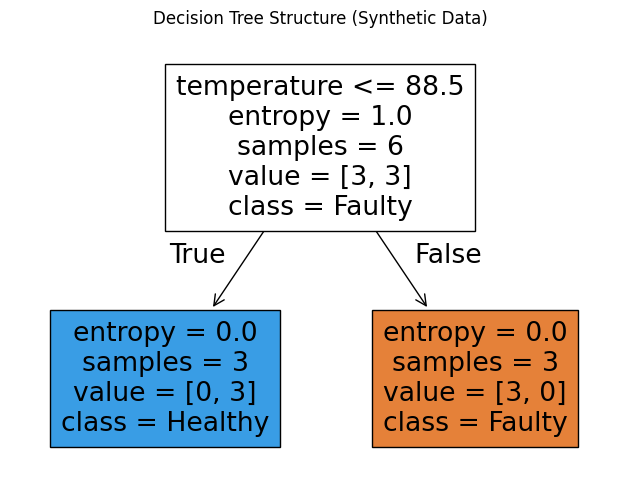

In [3]:
# Encode class labels
le = LabelEncoder()
df_synth['label'] = le.fit_transform(df_synth['class'])

# Features and labels
X = df_synth[['vibration', 'temperature', 'acoustic']]
y = df_synth['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Train Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)

# Predictions and probabilities
y_pred = dt.predict(X_test)
y_score = dt.predict_proba(X_test)[:, 1]

# Performance metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy:  {acc:.3f}\nPrecision: {prec:.3f}\nRecall:    {rec:.3f}\nF1-score:  {f1:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot(cmap='Blues')
plt.title('Synthetic Data - Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC={roc_auc:.2f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.title('Synthetic Data - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(8,6))
plot_tree(dt, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title('Decision Tree Structure (Synthetic Data)')
plt.show()

### 2️⃣ Real Predictive Maintenance Dataset

Now we use the real dataset that contains sensor readings and a binary target indicating whether the machine failed or not.

In [4]:
# Load real dataset
url = 'https://raw.githubusercontent.com/Dr-AlaaKhamis/ISE518/refs/heads/main/datasets/predictive_maintenance.csv'
df_real = pd.read_csv(url)
print('Dataset shape:', df_real.shape)
df_real.head()

Dataset shape: (10000, 10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


Accuracy:  0.973
Precision: 0.705
Recall:    0.365
F1-score:  0.481


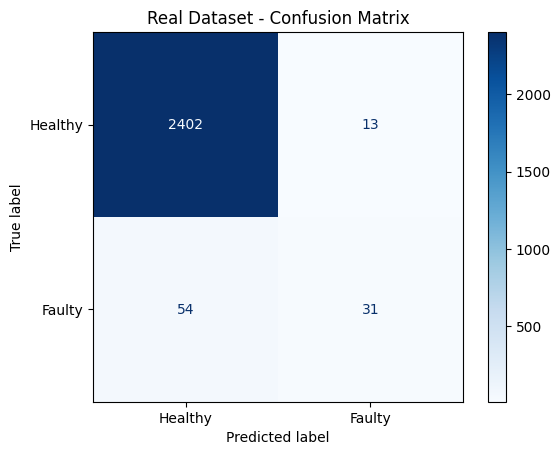

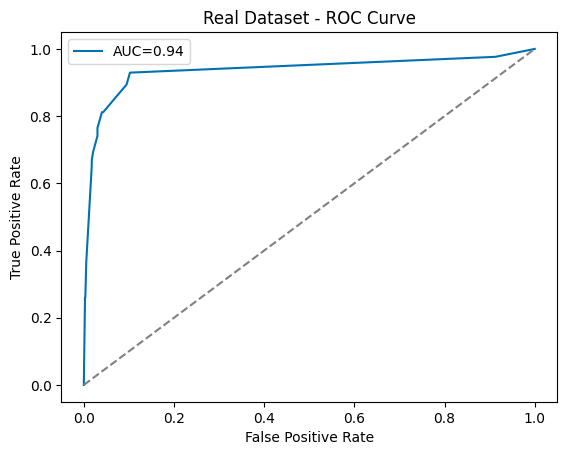

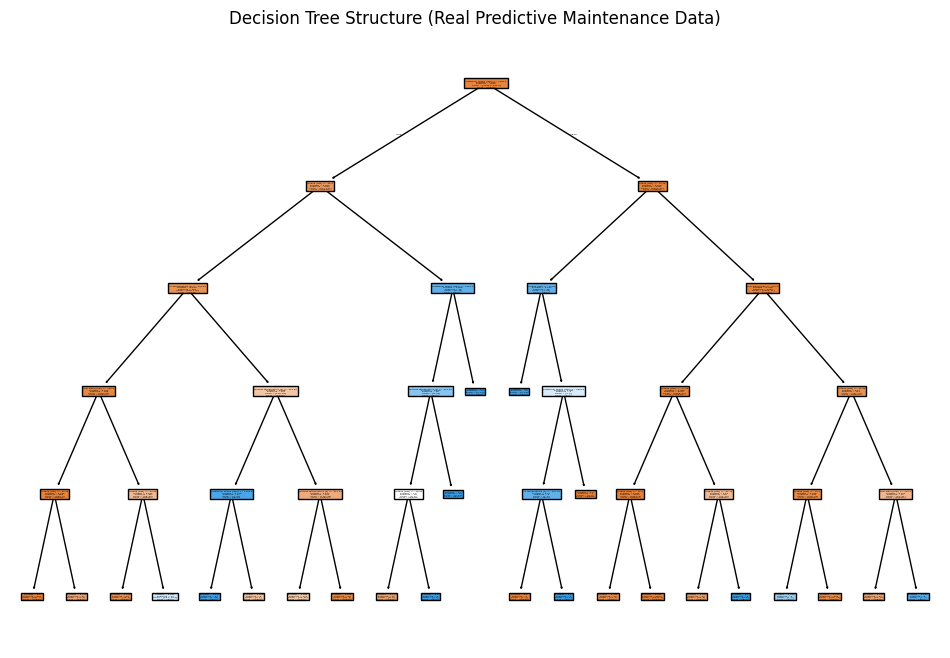

In [5]:
# Prepare features and labels
X = df_real.drop(columns=['UDI', 'Product ID', 'Type', 'Target', 'Failure Type'])
y = df_real['Target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Train Decision Tree
dt_real = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_real.fit(X_train, y_train)

# Predictions and probabilities
y_pred = dt_real.predict(X_test)
y_score = dt_real.predict_proba(X_test)[:, 1]

# Compute performance metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy:  {acc:.3f}\nPrecision: {prec:.3f}\nRecall:    {rec:.3f}\nF1-score:  {f1:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Healthy','Faulty']).plot(cmap='Blues')
plt.title('Real Dataset - Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC={roc_auc:.2f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.title('Real Dataset - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(dt_real, feature_names=X.columns, class_names=['Healthy','Faulty'], filled=True)
plt.title('Decision Tree Structure (Real Predictive Maintenance Data)')
plt.show()

## ✅ Summary
- **Synthetic dataset:** Demonstrates fundamental tree concepts.
- **Real dataset:** Represents a realistic predictive maintenance use case.

### Key Insights
- Decision Trees are intuitive and interpretable.
- ROC and F1-score are key metrics in fault detection problems.
- High recall is crucial in predictive maintenance — missing a fault is costlier than a false alarm.